In [1]:
import numpy as np
import pandas as pd

%run _color_tools.ipynb

The color palette is saved in the global variable, C
C = color_palette(blue='#0077bb', green='#009988', orange='#ee7733', red='#cc3311', light_blue='#33bbee', pink='#ee3377', grey='#bbbbbb', black='#000000')


In [2]:
region_sizes = pd.read_csv("../outputs/stats_region_size.tsv", sep="\t")
region_sizes = region_sizes.query("region != 'start_proximal'")
region_sizes["constraint"] = region_sizes["constraint"].str.capitalize()

In [3]:
def plot_region_sizes(
    df,
    ax,
    region="transcript",
    legend=False,
    xlabel=False,
    yticklabels=False,
    ylabel=False,
):

    df = df.query(f"region == '{region}'")  # .drop("region", axis=1

    colors = {
        "Constrained": C.red,
        "Unconstrained": C.grey,
        "Indeterminate": adjust_lightness(C.grey, 0.5),
    }

    labels = {
        "transcript": "Transcript",
        "nmd_target": "NMD Target",
        "long_exon": "Long Exon",
        "distal_nmd": "Distal",
    }

    sns.violinplot(
        ax=ax,
        data=df,
        x="size",
        y="constraint",
        dodge=True,
        width=0.8,
        cut=1,
        gridsize=4000,
        palette=colors,
        order=["Constrained", "Indeterminate", "Unconstrained"],
        scale="width",
        linewidth=1,
    )

    # Y axis
    ax.set_yticklabels([])
    ax.tick_params(axis="y", length=0, pad=7)

    if ylabel:
        ax.set_ylabel(labels[region])
    else:
        ax.set_ylabel(None)

    # X axis
    ax.set_xlim((0, 3000))

    if xlabel:
        ax.set_xlabel(xlabel)
    else:
        ax.set_xlabel(None)

    return None

In [4]:
cm = 1 / 2.54

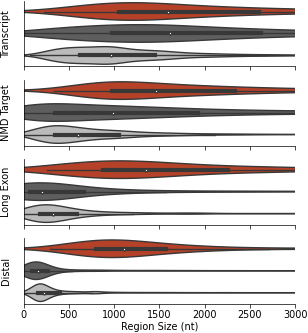

In [5]:
fig, axs = plt.subplots(4, 1, figsize=(8.9 * cm, 10 * cm), sharex=True)

plot_region_sizes(
    region_sizes, axs[0], "transcript", yticklabels=True, legend=True, ylabel=True
)
plot_region_sizes(
    region_sizes, axs[1], "nmd_target", yticklabels=True, legend=True, ylabel=True
)
plot_region_sizes(
    region_sizes, axs[2], "long_exon", yticklabels=True, legend=True, ylabel=True
)
plot_region_sizes(
    region_sizes,
    axs[3],
    "distal_nmd",
    xlabel="Region Size (nt)",
    yticklabels=True,
    ylabel=True,
    legend=True,
)


# plt.savefig("../plots/fig_s1_region_sizes.svg", format="svg")